# 6. 결정트리

**기본설정**

파이썬 3.7 이상을 요구한다.

In [1]:
import sys

assert sys.version_info >= (3, 7)

사이킷런 1.0.1 이상을 요구한다.

In [2]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

다음은 이미지에 포함된 폰트 크기를 설정한다.

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/decision_trees` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [4]:
from pathlib import Path

# 이미지 저장용 디렉토리 지정
IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

## 6.1. 결정트리 훈련과 활용

### 6.1.1. 결정트리 훈련

`DecisionTreeClassifier` 클래스는 결정트리 알고리즘을 활용한 분류 모델을 지원한다.
아래 코드는 붓꽃 데이터의 꽃잎 길이와 꽃잎 너비 특성만을 이용한 결정트리 모델의 훈련방법을 보여준다.

- `max_depth=2`: 가지분할을 최대 2번까지만 허용하는 규제

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 6.1.2. 결정트리 시각화

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

아래 코드를 실행하기 위해 먼저 파이썬과 (우분투) 리눅스에서 다음 두 패키지를 설치해야 한다. 
구글 코랩의 경우 기본으로 지원된다. 

- 파이썬 graphviz 패키지: 

    ```
    conda install python-graphviz
    ```
    <br><br>

- 우분투 graphviz 패키지: 

    ```
    sudo apt-get update
    sudo apt-get -y install graphviz
    ```

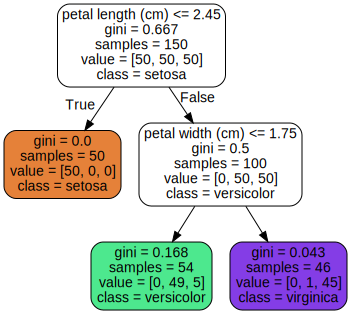

In [7]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  # path differs in the book

**`dot` 커맨드라인 명령 API** 

`.dot` 파일을 pdf, png 파일 등으로 변환하는 도구이다. 

```python
# dot 이미지 파일 변환 코드 예제
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}
```

**주의사항:** 느낌표(`!`)는 주피터 노트북에서 파이썬 명령문이 아닌 
커맨드라인 명령문을 실행할 때 사용하는 기호이다.

### 6.1.3. 클래스 예측

아래 코드는 가지분할을 최대 3번까지 허용해서 얻어진 모델의 훈련샘플들에 대한 예측결과를 
그래프로 보여준다.

- 1차 분할 기준: 꽃잎 길이=2.45cm
- 2차 분할 기준: 꽃잎 너비=1.75cm
- 3차 분할 기준: (우상단) 꽃잎 길이=4.85cm, (우하단) 꽃잎 길이=4.95cm

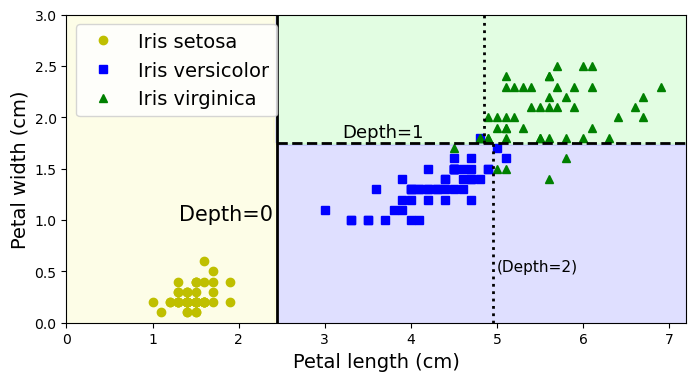

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 백그라운드 색상을 지정한다. 
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

# 모든 점을 색상으로 구분한다. 
# 세토사 영역: 옅노랑
# 버시컬러 영역: 옅파랑
# 버지니카 영역: 옅초록
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# 붓꼿 데이터셋에 대한 결정트리 훈련
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)

# 결정경계 그리기
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

graphviz 이용한 결과는 다음과 같다.

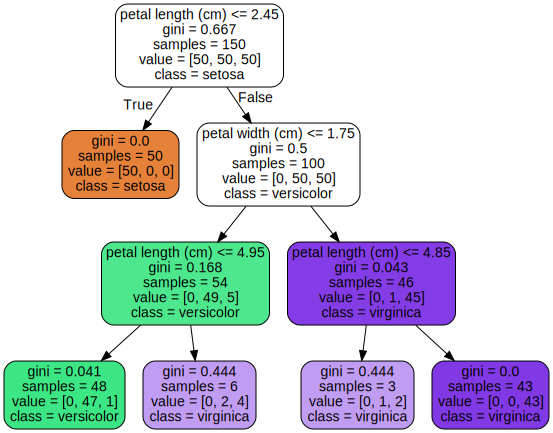

In [9]:
export_graphviz(
        tree_clf_deeper,
        out_file=str(IMAGES_PATH / "iris_tree_deeper.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(IMAGES_PATH / "iris_tree_deeper.dot")

훈련된 결정트리의 모든 정보는 `tree_` 속성에 저장된다.

In [10]:
tree_clf_deeper.tree_

각 노드의 지니 불순도는 다음과 같이 확인한다.

In [11]:
tree_clf_deeper.tree_.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04079861,
       0.44444444, 0.04253308, 0.44444444, 0.        ])

### 6.1.4. 클래스 확률 추정

꽃잎의 길이와 너비가 각각 5cm, 1.5cm인 붓꽃 샘플에 대한 각 클래스별 추정 확률은 다음과 같다.

In [12]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

가장 높은 확률을 갖는 클래스를 예측값으로 사용하며,
꽃잎의 길이와 너비가 5cm, 1.5cm인 붓꽃은 버시컬러로 추정된다. 

- 0: 세토사
- 1: 버시컬러
- 2: 버지니카

In [13]:
tree_clf.predict([[5, 1.5]])

array([1])

`maximal_depth=3`으로 하면 버지니카로 추정한다.

In [14]:
tree_clf_deeper.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.333, 0.667]])

In [15]:
tree_clf_deeper.predict([[5, 1.5]])

array([2])

## 6.2. CART 훈련 알고리즘

### 6.2.1. CART 알고리즘의 시간복잡도

### 6.2.2. 지니 불순도 vs. 엔트로피

### 6.2.3. 규제 하이퍼파라미터

아래 코드는 `min_samples_leaf=5` 규제를 사용하는 모델(아래 그림 오른쪽)과
어느 규제도 사용하지 않은 모델(아래 그림 왼쪽)의 차이를 보여준다.
사용되는 훈련세트는 moons 데이터셋이다.

- 왼쪽 결정트리: 과대적합 발생
- 오른쪽 결정트리: `min_samples_leaf=5` 규제 사용. 즉, 리프에 최소 5개 이상의 샘플이 포함되어야 함.

In [16]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

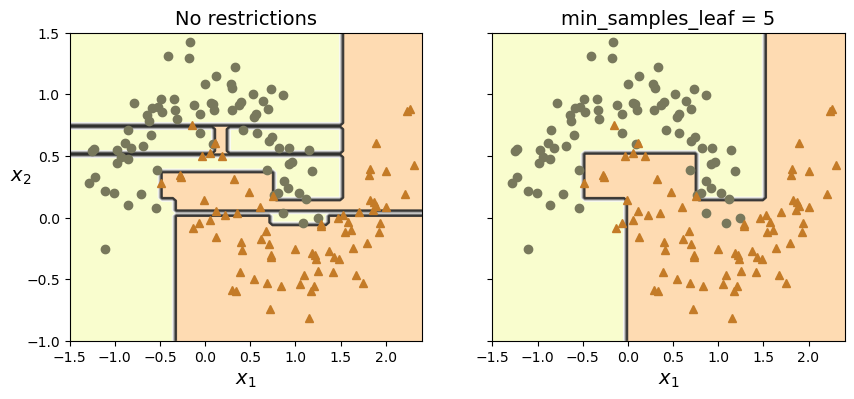

In [17]:
# 아래 그래프 그리는 코드

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")

# 오른쪽 그래프
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

plt.show()

규제 있는 모델의 일반화 성능이 훨씬 좋다.
아래 코드는 다시 임의로 생성된 moons 데이터셋에 대한 두 모델의 분류 결과를 보여준다.

* 규제 없는 모델

In [18]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

* 규제 있는 모델

In [19]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## 6.3. 회귀 결정트리

**코드 예제**

잡음이 포함된 2차 함수 형태의 데이터셋을 이용하여 회귀 결정트리를 훈련시킨다.

In [20]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

생성된 데이터셋의 산점도는 다음과 같다.

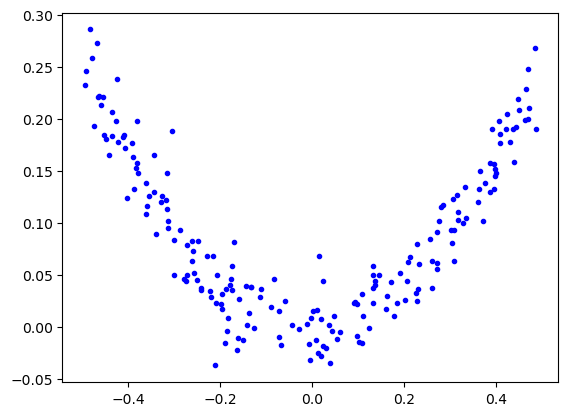

In [21]:
plt.plot(X_quad, y_quad, "b.")
plt.show()

`DecisionTreeRegressor` 모델을 훈련시키는 방법은 분류 결정트리와 거의 동일하다.

In [22]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

`x1=0.2`에 대한 예측값은 0.028 정도이다.

In [23]:
tree_reg.predict([[0.2]])

array([0.02765993])

훈련된 결정트리는 다음과 같다.

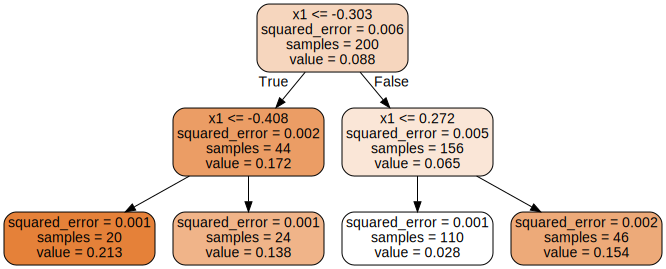

In [24]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file(IMAGES_PATH / "regression_tree.dot")

`max_depth=3` 으로 지정하고 훈련시켜보자.

In [25]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

두 결정트리가 알아낸 분할 기준점은 각각 다음과 같다.

In [26]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [27]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

아래 함수는 훈련세트와 노드별 예측값(빨강 직선)을 그린다.

In [28]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

- 왼편 그림: `max_depth=2`인 경우
- 오른편 그림: `max_depth=3`인 경우

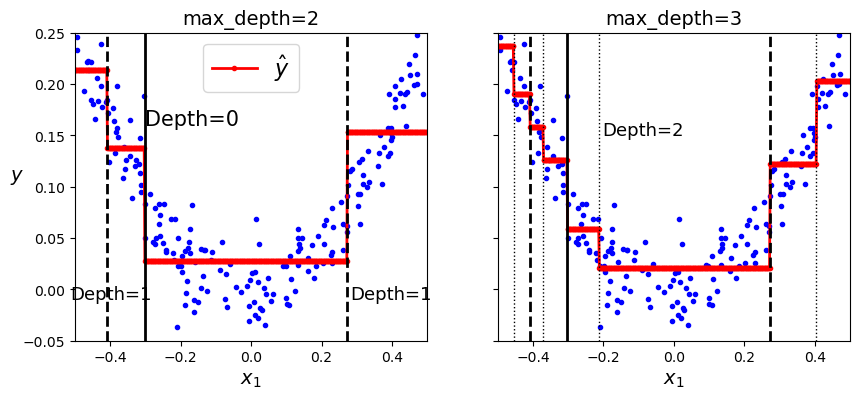

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그림
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

# 오른쪽 그림
plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

# save_fig("tree_regression_plot")
plt.show()

아래 코드는 `min_samples_leaf=10` 규제를 사용하는 회귀모델(아래 그림 오른편)과
어느 규제도 사용하지 않은 회귀모델(아래 그림 왼편)의 차이를 보여준다.

- 왼편 결정트리: 과대적합 발생
- 오른편 결정트리: `min_samples_leaf=10` 규제 사용. 즉, 리프노드에 최소 10개 이상의 샘플이 포함되어 있어야 함.

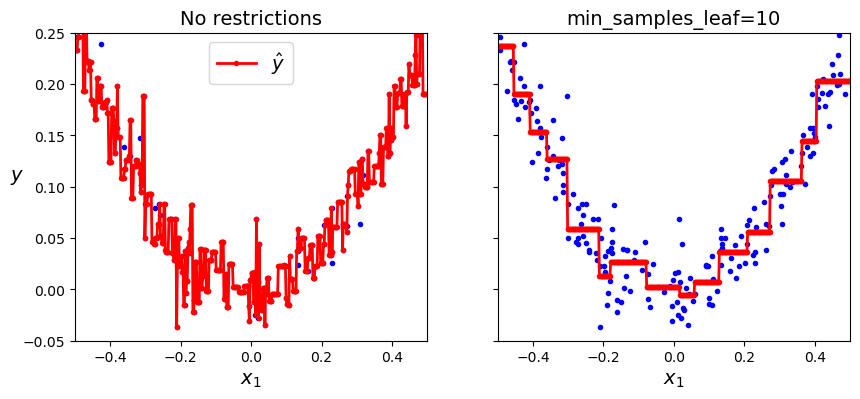

In [30]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그림
plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

# 오른쪽 그림
plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

# save_fig("tree_regression_regularization_plot")
plt.show()

## 6.4 결정트리의 단점

### 6.4.1. 훈련셋 회전 민감도

**예제 1**

아래 코드는 결정트리 모델의 회전 민감도를 보여준다.
두 개의 특성을 가지며, 임의로 생성된 100개의 훈련 샘플을 시계방향으로 45도 회전시킨 후
훈련시킨 모델의 결정경계가 직선에서 계단식으로 변화되는 것을 볼 수 있다.
결국 일반화 성능이 보다 약한 모델이 생성되었다.

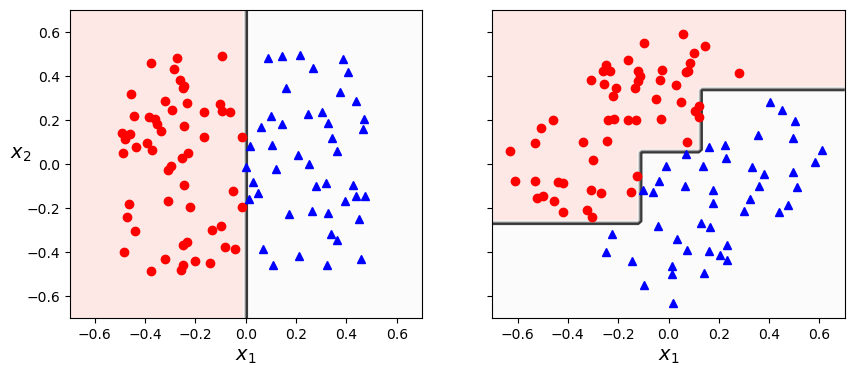

In [31]:
# 훈련셋 생성
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

# 45도 시계방향으로 회전
angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

# 두 결정트리 훈련
tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼쪽 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
# 오른쪽 그래프
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

plt.show()

**예제 2**

아래 코드는 붗꽃 데이터셋에 대해 PCA 기법으로 먼저 축을 회전시킨 다음에 결정트리를 훈련시키면 분류 모델의 결정경계가 이전과 많이 다름을 잘 보여준다.

In [32]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

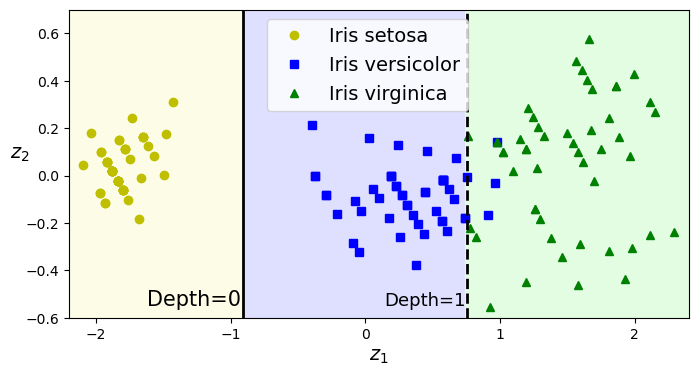

In [33]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
# save_fig("pca_preprocessing_plot")

plt.show()

### 6.4.2. 높은 분산

결정트리는 꽤 높은 분산을 갖는다. 즉, 훈련셋이나 하이퍼파라미터가 조금만 달라져도 완전히 다른 결정트리가 훈련될 수 있다. 심지어 동일한 모델을 훈련시켜도 많이 다른 결정트리가 생성되기도 한다. 이는 결정트리가 생성될 때 특성과 특성의 임곗값을 무작위로 선택하기 때문이다. 따라서 `random_state` 를 지정하지 않으면 아래 그래프와 같은 많이 다른 결정트리가 생성되기도 한다.

In [34]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

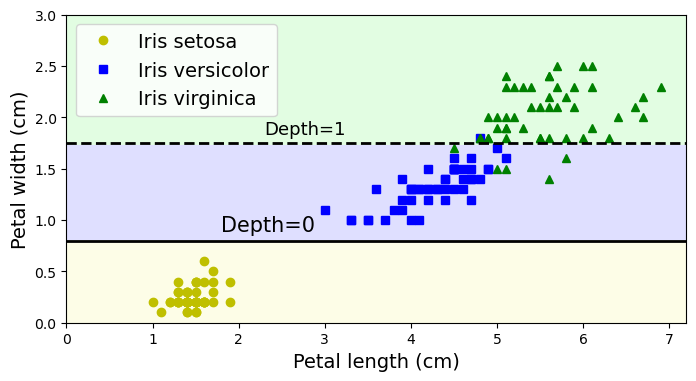

In [35]:
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

## 부록 - 결정트리 구조

훈련된 `DecisionTreeClassifier`는 트리 구조를 `tree_` 속성에 저장한다.

In [36]:
tree = tree_clf.tree_
tree

- 전체 노드 수

In [37]:
tree.node_count

5

- 트리 깊이

In [38]:
tree.max_depth

2

- 분류에 사용된 클래스 수

In [39]:
tree.max_n_classes

3

- 분류에 사용된 특성 수

In [40]:
tree.n_features

2

- 레이블 종류 개수: 여기서는 1

In [41]:
tree.n_outputs

1

- 나뭇잎(leaves) 수

In [42]:
tree.n_leaves

3

**노드 정보**

노드에 대한 모든 정보는 1차원 넘파이 어레이로 저장된다.

- 노드(5개) 각각에서의 지니 불순도

In [43]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

- 각 노드의 왼쪽 자식 노드와 오른쪽 자식 노드의 인덱스. 아래 코드는 루트 노드의 자식 노드 인덱스 확인.

In [44]:
tree.children_left[0], tree.children_right[0]

(1, 2)

- 모든 노드의 왼쪽 자식 노드

In [45]:
tree.children_left

array([ 1, -1,  3, -1, -1], dtype=int64)

- 모든 노드의 오른쪽 자식 노드

In [46]:
tree.children_right

array([ 2, -1,  4, -1, -1], dtype=int64)

- 왼쪽, 오른쪽 자식 노드의 인덱스가 동일한 경우 해당 노드가 이파리이 임을 의미함.
    아래 코드는 3번 노드가 이파리임을 보여줌.

In [47]:
tree.children_left[3], tree.children_right[3]

(-1, -1)

- 이파리 노드 확인 방법

In [48]:
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

- 자식을 갖는 노드에서 노드를 쪼갤 때 사용된 특성 정보는 `feature` 속성에 저장.
    아래 결과는 0번과 2번 노드가 자식을 갖는 노드임을 확인해줌. 음수는 이파리 노드임을 의미.

In [49]:
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

- 노드를 쪼갤 때 사용된 임계값도 확인 가능. 음수는 무시할 것.

In [50]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

- 각 노드에 포함된 클래스별 샘플 수

In [51]:
tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0.,  1., 45.]]])

In [52]:
tree.value.shape

(5, 1, 3)

- 각 노드에 포함된 샘플 수

In [53]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

- 각 노드에서 클래스별 샘플의 합을 합친 결과는 해당 노드에 포함된 샘플 수와 동일함

In [54]:
np.all(tree.value.sum(axis=(1, 2)) == tree.n_node_samples)

True

아래 코드는 각 노드의 깊이를 계산한다.

- 스택 자료형 활용. 리스트의 `append()` 와 `pop()` 메서드 이용.
- `append()` 메서드가 푸쉬(push) 기능 수행.

In [55]:
def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth

각 노드별 깊이

In [56]:
depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

- 깊이가 1인 노드 중에서 노드를 쪼갤 때 사용된 특성. 아래 코드에서 1은 꽆잎 너비를 가리킴.

In [57]:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1], dtype=int64)

- 깊이가 1인 노드 중에서 노드를 쪼갤 때 사용된 임계값

In [58]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])

## 연습문제

## 1. to 6.

1. The depth of a well-balanced binary tree containing _m_ leaves is equal to log₂(_m_), rounded up. log₂ is the binary log; log₂(_m_) = log(_m_) / log(2). A binary Decision Tree (one that makes only binary decisions, as is the case with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of log₂(10<sup>6</sup>) ≈ 20 (actually a bit more since the tree will generally not be perfectly well balanced).
2. A node's Gini impurity is generally lower than its parent's. This is due to the CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its children's Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child's impurity. For example, consider a node containing four instances of class A and one of class B. Its Gini impurity is 1 – (1/5)² – (4/5)² = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A, A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node's Gini impurity is 1 – (1/2)² – (1/2)² = 0.5, which is higher than its parent's. This is compensated for by the fact that the other node is pure, so its overall weighted Gini impurity is 2/5 × 0.5 + 3/5 × 0 = 0.2, which is lower than the parent's Gini impurity.
3. If a Decision Tree is overfitting the training set, it may be a good idea to decrease `max_depth`, since this will constrain the model, regularizing it.
4. Decision Trees don't care whether or not the training data is scaled or centered; that's one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.
5. The computational complexity of training a Decision Tree is 𝓞(_n_ × _m_ log(_m_)). So if you multiply the training set size by 10, the training time will be multiplied by _K_ = (_n_ × 10 _m_ × log(10 _m_)) / (_n_ × _m_ × log(_m_)) = 10 × log(10 _m_) / log(_m_). If _m_ = 10<sup>6</sup>, then _K_ ≈ 11.7, so you can expect the training time to be roughly 11.7 hours.
6. If the number of features doubles, then the training time will also roughly double.

## 7.

초승달 데이터셋을 이용한 결정트리 모델을 미세 조정한다.

a. 초승달 데이터셋 생성

In [59]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. 훈련셋과 테스트셋으로 쪼개기

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

c. 교차검증을 사용하는 그리드 탐색 실행. 힌트: 다양한 `max_leaf_nodes` 값 활용.

In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

최적의 분류기 확인

In [62]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

d. 최적 모델을 전체 훈련셋에 대해 훈련을 다시 진행한 다음 테스트셋에 대한 정확도를 확인할 것. 85% ~ 87% 정도의 정확도 나와야 함.

단, `GridSearchCV`는 자동으로 전체 훈련셋을 대상으로 한 번 더 훈련한다.
이 옵션을 원하지 않는다면 `refit=False` 옵션을 `GridSearchCV` 를 선언할 때 지정한다.
따라서 단순히 아래와 같이 바로 테스트셋에 대한 정확도를 확인할 수 있다.

In [63]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

## 8.

랜덤 포레스트(random forest) 모델을 훈련하는 방법을 살펴본다.
랜덤 포레스트는 여러 개의 결정트리로 구성된다.

a. 무작위로 선택된 100개의 초승달 훈련 샘플로 구성된 훈련셋을 1000개 생성한다.
이를 위해 사이킷런의 `ShuffleSplit` 클래스를 이용한다.

In [64]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000    # 결정트리 수. 즉, 결정숲 크기.
n_instances = 100 # 각 결정트리 훈련에 사용되는 훈련셋 크기

mini_sets = []    # 1000개의 결정트리 훈련에 사용될 미니 훈련셋(크기 100)과 타깃셋 튜플들의 리스트 저장

# 1000개의 미니 훈련셋에 포함될 샘플들의 인덱스를 무작위 선택하는 객체 생성
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

# split 메서드가 X_train 대상으로 1000개의 미니 훈련셋에 포함될 샘플들의 인덱스를 무작위 선택
for mini_train_index, mini_test_index in rs.split(X_train): 
    X_mini_train = X_train[mini_train_index] # 미니 훈련셋
    y_mini_train = y_train[mini_train_index] # 타깃셋
    
    mini_sets.append((X_mini_train, y_mini_train))

b. 앞서 찾은 최적의 모델을 각 미니 훈련셋에 대해 추가 훈련한 다음 테스트셋에 대한 정확도의 평균값을 계산한다.
결과는 80% 정도.

- `clone()` 함수: 모델 복제. 동일 모델을 반복해서 사용하지 않기 위해 사용.

In [65]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8056605

c. 이번에는 그런데 1000개의 모델의 정확도의 평균이 아닌 1000개의 모델이 가장 많이 예측하는 값을 예측값으로 사용해보자.

In [66]:
# 1000개의 모델이 테스트셋에 대해 예측한 값들로 이뤄진 2차원 어레이
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

# 1000개의 모델이 테스트셋에 대해 예측한 값
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

아래 코드는 테스트셋에 포함된 샘플별로 1000개의 모델이 예측한 값(클래스)의 최빈값(mode)를 계산한다.

In [67]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0, keepdims=True)

In [68]:
print(f"mode: {y_pred_majority_votes}", f"count: {n_votes}", sep='\n')

mode: [[1 1 0 ... 0 0 0]]
count: [[949 908 963 ... 918 993 615]]


d. 이 방식으로 계산된 예측값을 이용하면 정확도가 87% 정도로 상승한다.

- `y_pred_majority_votes.reshape([-1])`는 차원을 줄여 1차원 어레이로 변환한다.

In [69]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873

e. 결론: 이와 같이 작은 모델 여러 개의 예측값 최빈값을 이용하는 방식을 앙상블 학습이라 한다.
결정트리를 이용한 앙상블 학습 모델 중에 하나가 다음에 배울 랜덤 포레스트(random forest) 모델이다.